In [1]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [3]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [8]:
binary_1mil = load_data('COMPAS_Output_1mil_copy.h5', 'BSE')
binary_merger_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 15, 15) #merger products only
merger_progenitor_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 0, 1) 

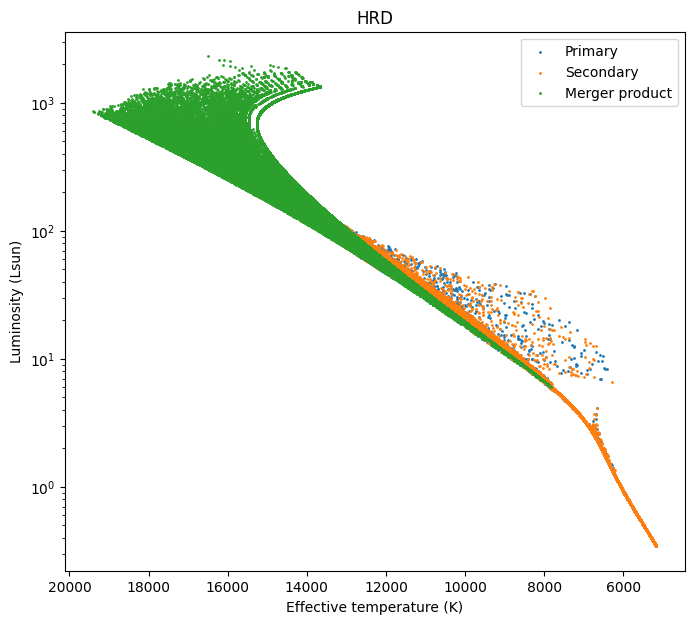

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(merger_progenitor_1mil.Teff1, merger_progenitor_1mil.L1, label = 'Primary', s = 1)
plt.scatter(merger_progenitor_1mil.Teff2, merger_progenitor_1mil.L2, label = 'Secondary', s = 1)
plt.scatter(binary_merger_1mil.Teff1, binary_merger_1mil.L1, label = 'Merger product', s = 1)
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()